Vamos importar o dataset de DDoS do site Hugging Face: https://huggingface.co/datasets/rhyssh/DDOS18/tree/main

A primeira etapa é entender o dataset e quais informações podem ser obtidas a partir dele

In [4]:
import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/DDOS02142018.csv')

In [5]:
# Display the first 10 rows of the DataFrame
print(df.head(10))

   Dst Port  Protocol            Timestamp  Flow Duration  Tot Fwd Pkts  \
0         0         0  14/02/2018 08:31:01      112641719             3   
1         0         0  14/02/2018 08:33:50      112641466             3   
2         0         0  14/02/2018 08:36:39      112638623             3   
3        22         6  14/02/2018 08:40:13        6453966            15   
4        22         6  14/02/2018 08:40:23        8804066            14   
5        22         6  14/02/2018 08:40:31        6989341            16   
6         0         0  14/02/2018 08:39:28      112640480             3   
7         0         0  14/02/2018 08:42:17      112641244             3   
8        80         6  14/02/2018 08:47:14         476513             5   
9        80         6  14/02/2018 08:47:15         475048             5   

   Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  Fwd Pkt Len Max  \
0             0                0                0                0   
1             0                0  

In [6]:
# Create a DataFrame with column names and their data types
column_info = pd.DataFrame({'Column Name': df.columns, 'Data Type': df.dtypes})

# Display the DataFrame as a table
display(column_info)

,Column Name,Data Type
Dst Port,Dst Port,int64
Protocol,Protocol,int64
Timestamp,Timestamp,object
Flow Duration,Flow Duration,int64
Tot Fwd Pkts,Tot Fwd Pkts,int64
...,...,...
Idle Mean,Idle Mean,float64
Idle Std,Idle Std,float64
Idle Max,Idle Max,int64
Idle Min,Idle Min,int64


Podemos ver quais portas são as mais visadas utilizando um gráfico de frequência

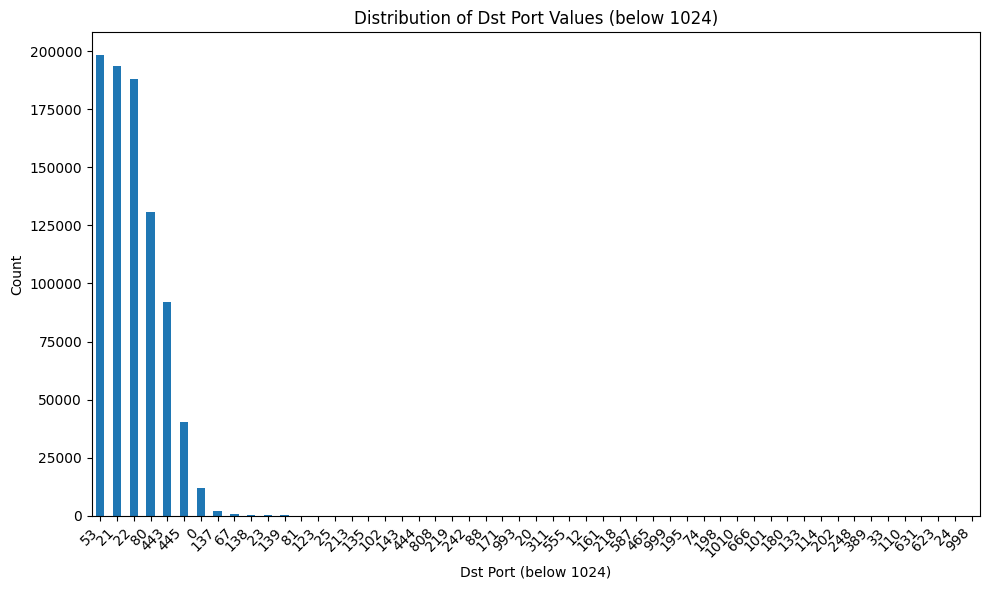

In [7]:
import matplotlib.pyplot as plt

# Filter values lower than 1024
filtered_df = df[df['Dst Port'] < 1024]

# Count the occurrences of each unique value in the filtered 'Dst Port' column
dst_port_counts = filtered_df['Dst Port'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
dst_port_counts.plot(kind='bar')
plt.xlabel('Dst Port (below 1024)')
plt.ylabel('Count')
plt.title('Distribution of Dst Port Values (below 1024)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

<ipython-input-23-5be301427659>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Duration Buckets'] = pd.cut(sampled_df['Flow Duration'], bins=bins, labels=labels)


Mean Flow Duration: 8385119.005435819
Median Flow Duration: 944.0


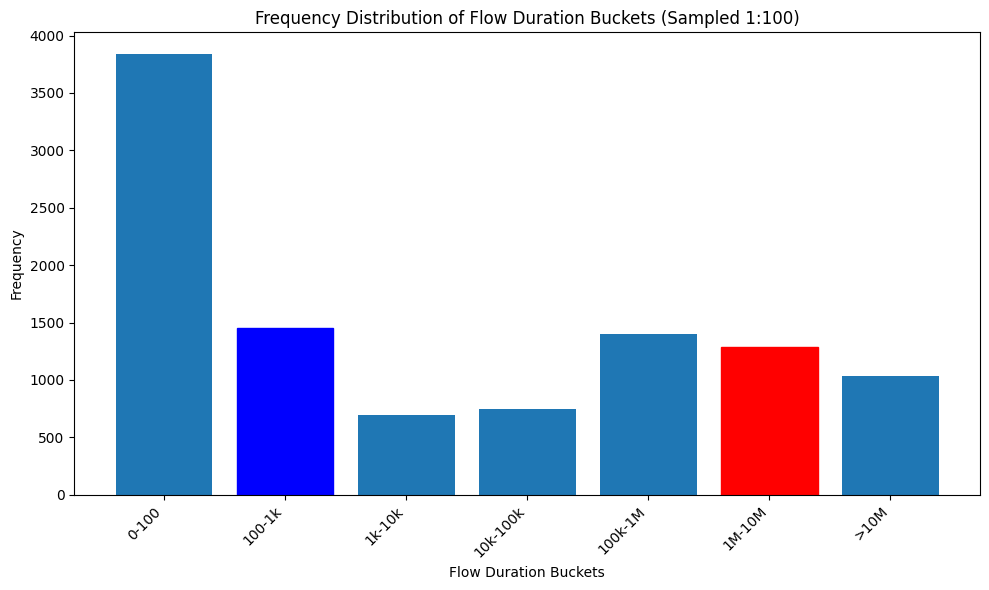

In [23]:
# Sample the DataFrame 1:100
sampled_df = df.iloc[::100, :]

# Define the buckets (intervals) for flow duration
bins = [0, 100, 1000, 10000, 100000, 1000000, 10000000, float('inf')]  # Customize these as needed

# Create labels for the buckets
labels = ['0-100', '100-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '>10M']

# Categorize the 'Flow Duration' values into buckets
sampled_df['Duration Buckets'] = pd.cut(sampled_df['Flow Duration'], bins=bins, labels=labels)

# Calculate frequency distribution for the buckets, preserving category order
bucket_counts = sampled_df['Duration Buckets'].value_counts().sort_index()

# Calculate the mean of 'Flow Duration'
mean_flow_duration = sampled_df['Flow Duration'].mean()

# Calculate the median of "Flow Duration"

median_flow_duration = sampled_df['Flow Duration'].median()

print("Mean Flow Duration:", mean_flow_duration)
print("Median Flow Duration:", median_flow_duration)

# Find the bucket containing the mean value
mean_bucket = pd.cut([mean_flow_duration], bins=bins, labels=labels)[0]

# Find the bucket containing the median value
median_bucket = pd.cut([median_flow_duration], bins=bins, labels=labels)[0]

# Create a bar plot for the bucket frequencies
plt.figure(figsize=(10, 6))
bars = plt.bar(bucket_counts.index, bucket_counts.values)

# Color the bar corresponding to the mean bucket in red
for i, label in enumerate(bucket_counts.index):
    if label == mean_bucket:
        bars[i].set_color('red')

# Color the bar corresponding to the median bucket in blue
for i, label in enumerate(bucket_counts.index):
    if label == median_bucket:
        bars[i].set_color('blue')

# Customize the plot
plt.xlabel('Flow Duration Buckets')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Flow Duration Buckets (Sampled 1:100)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Vamos agora avaliar como o flow duration muda ao longo do tempo baseado nos timestamps

<ipython-input-30-e7003488f6f8>:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sampled_df['Timestamp'] = pd.to_datetime(sampled_df['Timestamp'])
<ipython-input-30-e7003488f6f8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Timestamp'] = pd.to_datetime(sampled_df['Timestamp'])
<ipython-input-30-e7003488f6f8>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df.sort_values('Timestamp', inplace=True)


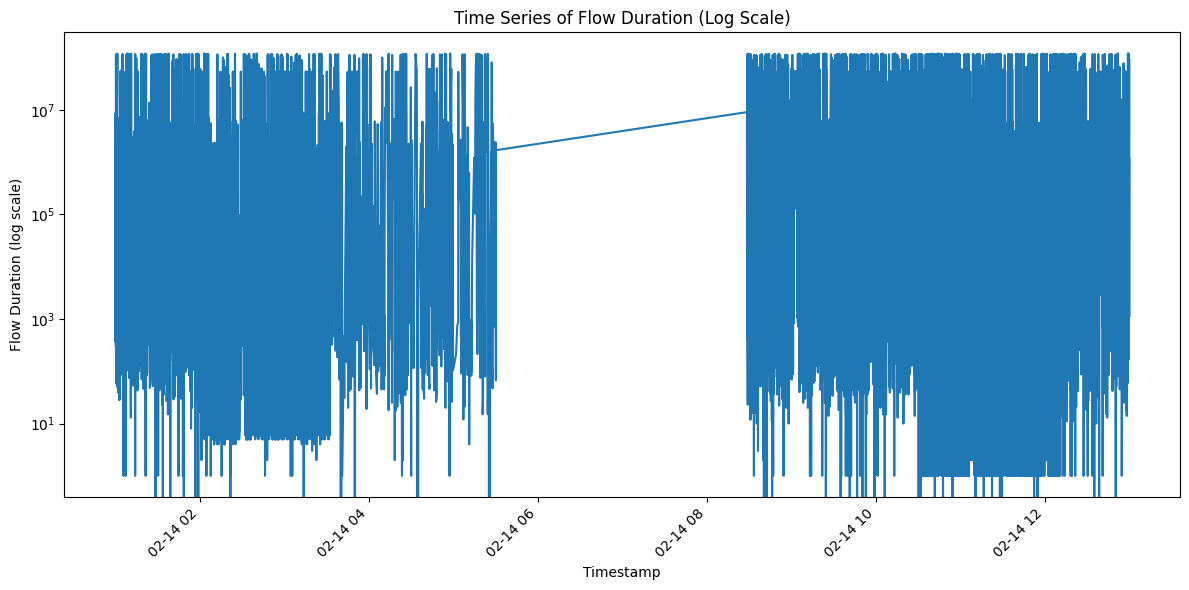

In [30]:
import matplotlib.pyplot as plt

# Sample the DataFrame 1:100
sampled_df = df.iloc[::100, :]

# Convert 'Timestamp' to datetime objects if it's not already
sampled_df['Timestamp'] = pd.to_datetime(sampled_df['Timestamp'])

# Sort the DataFrame by 'Timestamp'
sampled_df.sort_values('Timestamp', inplace=True)

# Set 'Timestamp' as index for easier plotting
sampled_df.set_index('Timestamp', inplace=True)

# Create the time series plot with log scale
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
plt.plot(sampled_df['Flow Duration'])
plt.yscale('log')  # Set y-axis to log scale
plt.xlabel('Timestamp')
plt.ylabel('Flow Duration (log scale)')
plt.title('Time Series of Flow Duration (Log Scale)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Os valores de duração de flow são muito voláteis, e é difícil observar alguma tendência nas durações.

Uma alternativa, é calcularmos médias móveis em janelas de tempo específicas

<ipython-input-29-ffddb5dd3f93>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Flow Duration 1H'] = sampled_df['Flow Duration'].rolling('1H').mean()
<ipython-input-29-ffddb5dd3f93>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Flow Duration 4H'] = sampled_df['Flow Duration'].rolling('4H').mean()
<ipython-input-29-ffddb5dd3f93>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

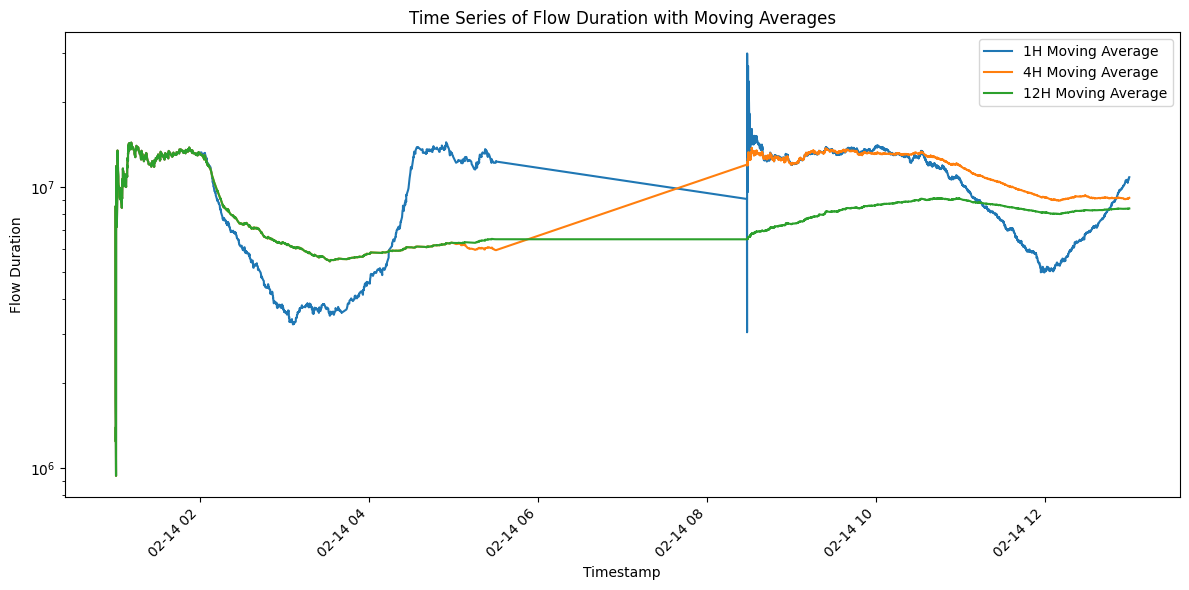

In [29]:
import matplotlib.pyplot as plt

# Calculate rolling means (no changes here)
sampled_df['Flow Duration 1H'] = sampled_df['Flow Duration'].rolling('1H').mean()
sampled_df['Flow Duration 4H'] = sampled_df['Flow Duration'].rolling('4H').mean()
sampled_df['Flow Duration 12H'] = sampled_df['Flow Duration'].rolling('12H').mean()

# Create the time series plot with moving averages
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Use the index for the x-axis (since 'Timestamp' is the index)
plt.plot(sampled_df.index, sampled_df['Flow Duration 1H'], label='1H Moving Average')
plt.plot(sampled_df.index, sampled_df['Flow Duration 4H'], label='4H Moving Average')
plt.plot(sampled_df.index, sampled_df['Flow Duration 12H'], label='12H Moving Average')

plt.yscale('log')  # Set y-axis to log scale (optional)
plt.xlabel('Timestamp')
plt.ylabel('Flow Duration')
plt.title('Time Series of Flow Duration with Moving Averages')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Aqui conseguimos observar um movimento mais "comportado", e verificar que temos alguns picos na duração de flows

<ipython-input-35-de99028de7db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Tot Fwd Pkts 1min'] = sampled_df['Tot Fwd Pkts'].rolling('1min').mean()
<ipython-input-35-de99028de7db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Tot Fwd Pkts 5min'] = sampled_df['Tot Fwd Pkts'].rolling('5min').mean()
<ipython-input-35-de99028de7db>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

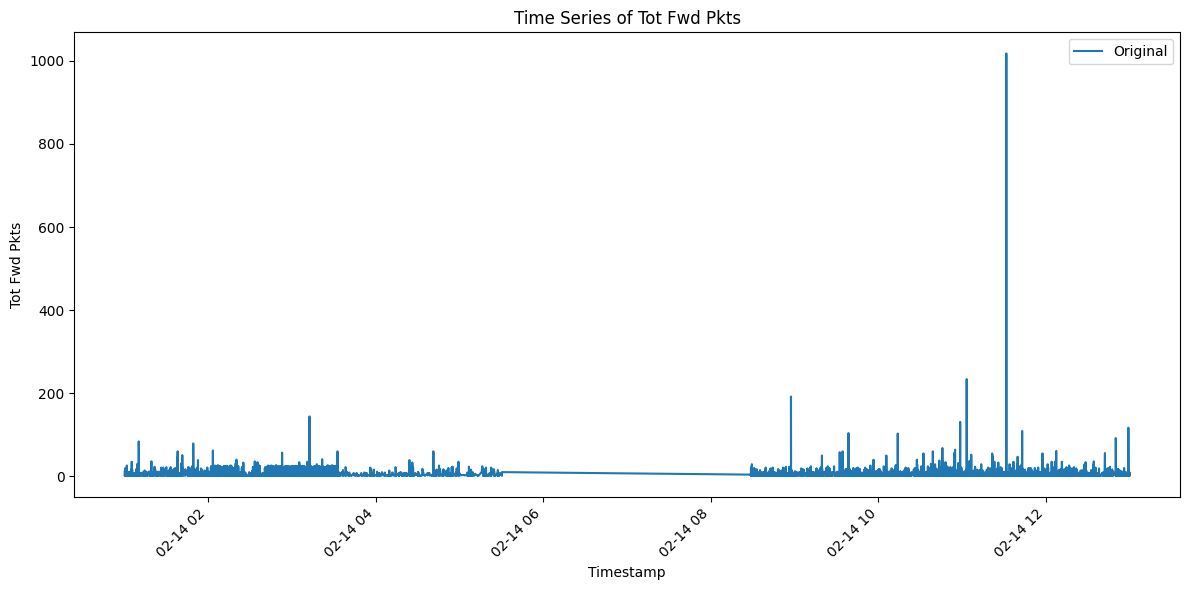

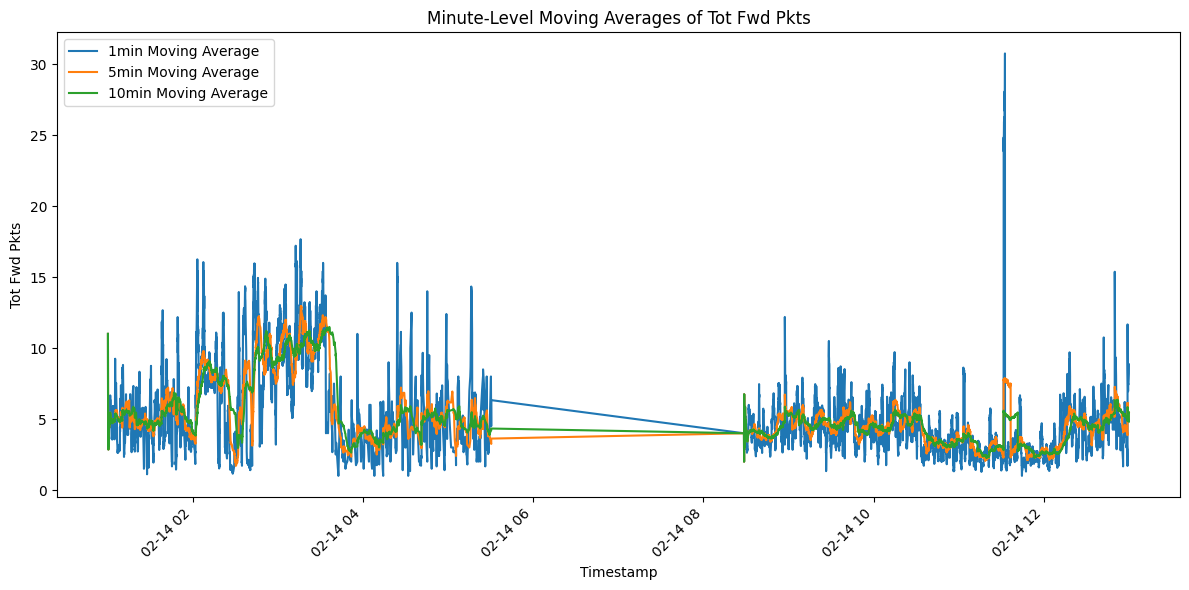

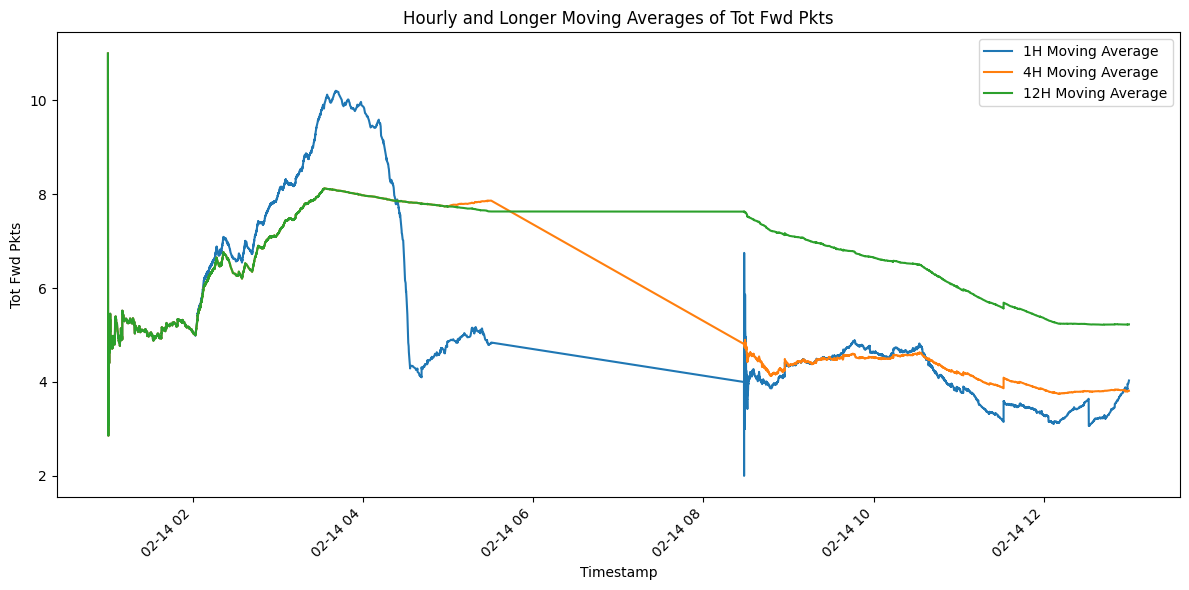

In [35]:
import matplotlib.pyplot as plt

# Calculate rolling means for 'Tot Fwd Pkts' (no changes here)
sampled_df['Tot Fwd Pkts 1min'] = sampled_df['Tot Fwd Pkts'].rolling('1min').mean()
sampled_df['Tot Fwd Pkts 5min'] = sampled_df['Tot Fwd Pkts'].rolling('5min').mean()
sampled_df['Tot Fwd Pkts 10min'] = sampled_df['Tot Fwd Pkts'].rolling('10min').mean()
sampled_df['Tot Fwd Pkts 1H'] = sampled_df['Tot Fwd Pkts'].rolling('1H').mean()
sampled_df['Tot Fwd Pkts 4H'] = sampled_df['Tot Fwd Pkts'].rolling('4H').mean()
sampled_df['Tot Fwd Pkts 12H'] = sampled_df['Tot Fwd Pkts'].rolling('12H').mean()

# Create the first plot for the original 'Tot Fwd Pkts' (no changes)
plt.figure(figsize=(12, 6))
plt.plot(sampled_df.index, sampled_df['Tot Fwd Pkts'], label='Original')
plt.xlabel('Timestamp')
plt.ylabel('Tot Fwd Pkts')
plt.title('Time Series of Tot Fwd Pkts')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Create the second plot for minute-level moving averages
plt.figure(figsize=(12, 6))
plt.plot(sampled_df.index, sampled_df['Tot Fwd Pkts 1min'], label='1min Moving Average')
plt.plot(sampled_df.index, sampled_df['Tot Fwd Pkts 5min'], label='5min Moving Average')
plt.plot(sampled_df.index, sampled_df['Tot Fwd Pkts 10min'], label='10min Moving Average')
plt.xlabel('Timestamp')
plt.ylabel('Tot Fwd Pkts')
plt.title('Minute-Level Moving Averages of Tot Fwd Pkts')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Create the third plot for hourly and longer moving averages
plt.figure(figsize=(12, 6))
plt.plot(sampled_df.index, sampled_df['Tot Fwd Pkts 1H'], label='1H Moving Average')
plt.plot(sampled_df.index, sampled_df['Tot Fwd Pkts 4H'], label='4H Moving Average')
plt.plot(sampled_df.index, sampled_df['Tot Fwd Pkts 12H'], label='12H Moving Average')
plt.xlabel('Timestamp')
plt.ylabel('Tot Fwd Pkts')
plt.title('Hourly and Longer Moving Averages of Tot Fwd Pkts')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Agora vamos calcular os desvios padrão para a média móvel de 5 min e criar dois intervalos de confiança para tentarmos observar possíveis anomalias nos dados

<ipython-input-38-3448c94f9203>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Tot Fwd Pkts 5min Mean'] = sampled_df['Tot Fwd Pkts'].rolling('5min').mean()
<ipython-input-38-3448c94f9203>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Tot Fwd Pkts 5min Std'] = sampled_df['Tot Fwd Pkts'].rolling('5min').std()
<ipython-input-38-3448c94f9203>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

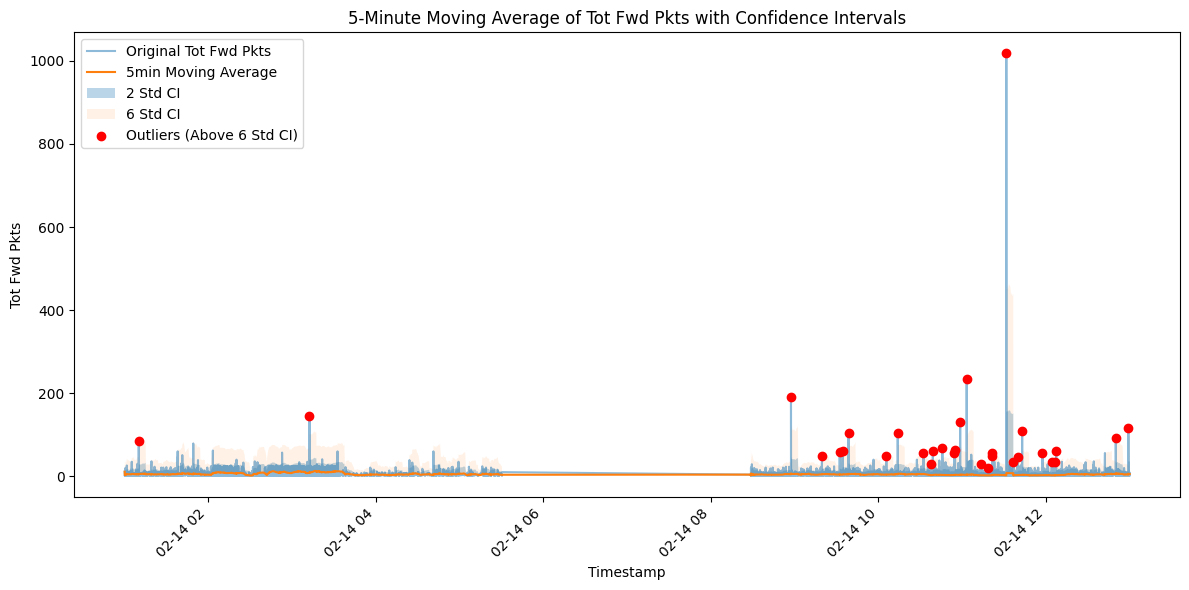

In [38]:
import matplotlib.pyplot as plt

# Calculate rolling means and standard deviation for 'Tot Fwd Pkts'
sampled_df['Tot Fwd Pkts 5min Mean'] = sampled_df['Tot Fwd Pkts'].rolling('5min').mean()
sampled_df['Tot Fwd Pkts 5min Std'] = sampled_df['Tot Fwd Pkts'].rolling('5min').std()

# Calculate confidence intervals
sampled_df['CI 2 Std Upper'] = sampled_df['Tot Fwd Pkts 5min Mean'] + 2 * sampled_df['Tot Fwd Pkts 5min Std']
sampled_df['CI 2 Std Lower'] = sampled_df['Tot Fwd Pkts 5min Mean'] - 2 * sampled_df['Tot Fwd Pkts 5min Std']
sampled_df['CI 6 Std Upper'] = sampled_df['Tot Fwd Pkts 5min Mean'] + 6 * sampled_df['Tot Fwd Pkts 5min Std']
sampled_df['CI 6 Std Lower'] = sampled_df['Tot Fwd Pkts 5min Mean'] - 6 * sampled_df['Tot Fwd Pkts 5min Std']

# Find points outside the 6-std confidence interval
outliers = sampled_df[sampled_df['Tot Fwd Pkts'] > sampled_df['CI 6 Std Upper']]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(sampled_df.index, sampled_df['Tot Fwd Pkts'], label='Original Tot Fwd Pkts', alpha=0.5)
plt.plot(sampled_df.index, sampled_df['Tot Fwd Pkts 5min Mean'], label='5min Moving Average')

# Plot only the upper confidence intervals
plt.fill_between(sampled_df.index, sampled_df['Tot Fwd Pkts 5min Mean'], sampled_df['CI 2 Std Upper'], alpha=0.3, label='2 Std CI')
plt.fill_between(sampled_df.index, sampled_df['Tot Fwd Pkts 5min Mean'], sampled_df['CI 6 Std Upper'], alpha=0.1, label='6 Std CI')

# Highlight outlier points
plt.scatter(outliers.index, outliers['Tot Fwd Pkts'], color='red', label='Outliers (Above 6 Std CI)', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('Tot Fwd Pkts')
plt.title('5-Minute Moving Average of Tot Fwd Pkts with Confidence Intervals')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-42-0ef6ad92039b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Tot Fwd Pkts 1H Mean'] = sampled_df['Tot Fwd Pkts'].rolling('1H').mean()
<ipython-input-42-0ef6ad92039b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sampled_df['Tot Fwd Pkts 1H Std'] = sampled_df['Tot Fwd Pkts'].rolling('1H').std()
<ipython-input-42-0ef6ad92039b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

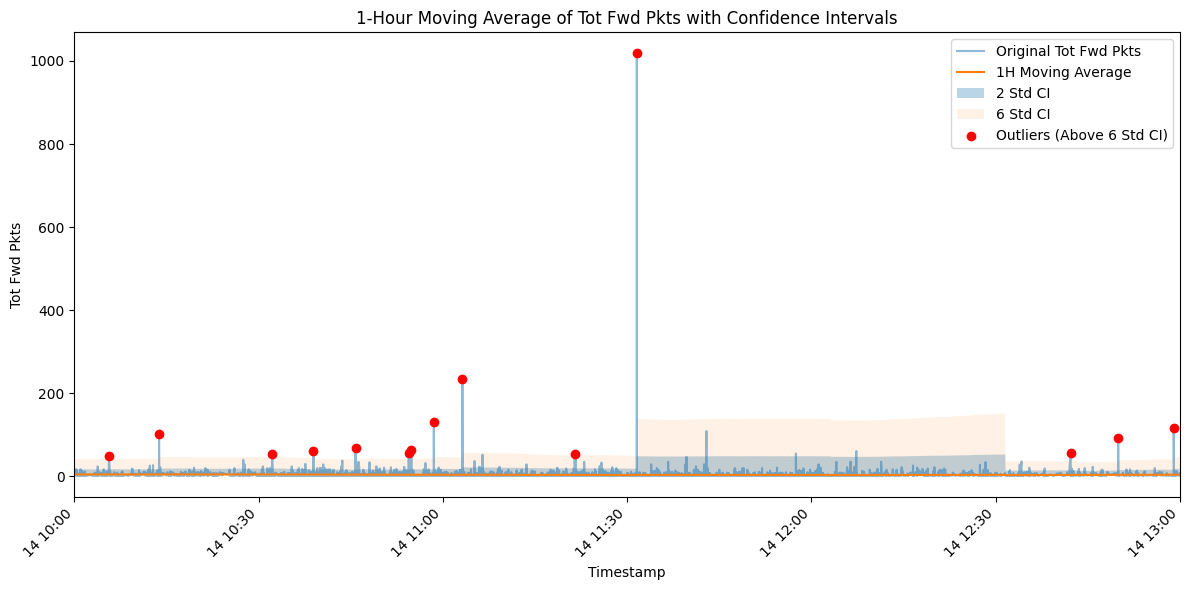

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate rolling means and standard deviation for 'Tot Fwd Pkts' (1-hour window)
sampled_df['Tot Fwd Pkts 1H Mean'] = sampled_df['Tot Fwd Pkts'].rolling('1H').mean()
sampled_df['Tot Fwd Pkts 1H Std'] = sampled_df['Tot Fwd Pkts'].rolling('1H').std()

# Calculate confidence intervals (1-hour window)
sampled_df['CI 2 Std Upper'] = sampled_df['Tot Fwd Pkts 1H Mean'] + 2 * sampled_df['Tot Fwd Pkts 1H Std']
sampled_df['CI 6 Std Upper'] = sampled_df['Tot Fwd Pkts 1H Mean'] + 6 * sampled_df['Tot Fwd Pkts 1H Std']

# Find points outside the 6-std confidence interval (1-hour window)
outliers = sampled_df[sampled_df['Tot Fwd Pkts'] > sampled_df['CI 6 Std Upper']]

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(sampled_df.index, sampled_df['Tot Fwd Pkts'], label='Original Tot Fwd Pkts', alpha=0.5)
plt.plot(sampled_df.index, sampled_df['Tot Fwd Pkts 1H Mean'], label='1H Moving Average')

# Plot only the upper confidence intervals
plt.fill_between(sampled_df.index, sampled_df['Tot Fwd Pkts 1H Mean'], sampled_df['CI 2 Std Upper'], alpha=0.3, label='2 Std CI')
plt.fill_between(sampled_df.index, sampled_df['Tot Fwd Pkts 1H Mean'], sampled_df['CI 6 Std Upper'], alpha=0.1, label='6 Std CI')

# Highlight outlier points
plt.scatter(outliers.index, outliers['Tot Fwd Pkts'], color='red', label='Outliers (Above 6 Std CI)', zorder=5)

plt.xlabel('Timestamp')
plt.ylabel('Tot Fwd Pkts')
plt.title('1-Hour Moving Average of Tot Fwd Pkts with Confidence Intervals')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Zoom in on the specified time range
plt.xlim(pd.to_datetime('2018-02-14 10:00'), pd.to_datetime('2018-02-14 13:00'))  # Adjust date if needed

plt.tight_layout()
plt.show()